In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
pwd

'/home/ubuntu/course-v3/nbs/dl1'

In [4]:
cd ~/course-v3/

/home/ubuntu/course-v3


In [5]:
pwd

'/home/ubuntu/course-v3'

In [6]:
ls

LICENSE              data_GPU/  floyd.yml               nbs/
README.md            docs/      floyd_requirements.txt  projects/
azure-pipelines.yml  files/     models/                 tools/


In [7]:
ls projects/breast-histo-PTM/dfs/

20181213-path-class.csv


In [8]:
df = pd.read_csv('./projects/breast-histo-PTM/dfs/20181213-path-class.csv'); df.head()

,Unnamed: 0,fpaths,fstems,fpaths_str,class_label
0,0,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x1501_y1001_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...,0
1,1,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x301_y751_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...,0
2,2,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x1551_y851_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...,0
3,3,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x401_y1001_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...,0
4,4,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x501_y1001_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...,0


# make databunch

In [9]:
path = Path('.')

In [14]:
# doc(ItemLists.transform)
# https://github.com/fastai/fastai/blob/master/fastai/data_block.py#L443

In [15]:
# doc(get_transforms) 
# https://github.com/fastai/fastai/blob/master/fastai/vision/transform.py#L273

In [16]:
# set all transforms to False or zero
tfms = get_transforms(do_flip=False, 
                      flip_vert=False, 
                      max_rotate=0., 
                      max_zoom=0., 
                      max_lighting=0., 
                      max_warp=0., 
                      p_affine=0., 
                      p_lighting=0.)

In [35]:
data = (ImageItemList.from_df(df=df, path=path, cols='fpaths')
                     .random_split_by_pct(valid_pct=0.2, seed=10)
                     .label_from_df(cols='class_label')
                     .transform(tfms, size=49)
                     .databunch(bs=128))

In [ ]:
# add padding mode
data = (ImageItemList.from_df(df=df, path=path, cols='fpaths')
                     .random_split_by_pct(valid_pct=0.2, seed=10)
                     .label_from_df(cols='class_label')
                     .transform(tfms, size=49, padding_mode=padding_mode)
                     .databunch(bs=128))

In [36]:
# note that exporting & importing a csv has turned my classes from srings to ints
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

([0, 1], 2, 222020, 55504)

In [37]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (222020 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: ImageItemList (222020 items)
[Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50)]...
Path: .;

Valid: LabelList
y: CategoryList (55504 items)
[Category 1, Category 0, Category 1, Category 1, Category 1]...
Path: .
x: ImageItemList (55504 items)
[Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50)]...
Path: .;

Test: None

In [38]:
data.train_ds

LabelList
y: CategoryList (222020 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: ImageItemList (222020 items)
[Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50)]...
Path: .

In [39]:
data.train_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f3d74ccc710>, device=device(type='cuda'), tfms=[], collate_fn=<function data_collate at 0x7f3da63f7620>)

# View Data

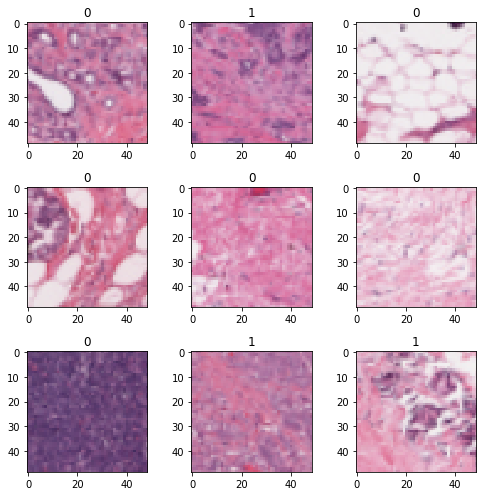

In [44]:
data.show_batch(rows=3, figsize=(7,7), hide_axis=False)

# Train a model

In [41]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

In [42]:
# 1 epoch
# learn.fit_one_cycle(1)

In [43]:
# learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,accuracy


KeyboardInterrupt: 

# Unfreeze & figure out learning rates using nbs from lessons 1 & 2